In [3]:
# Input data setting
# input raw data is generated from scopus search engine.

SCOPUS_RESULT_PATH = "D:/CSED526_DataMining/dataset/v2/scopus.csv"
OUTPUT_PATH = "D:/CSED526_DataMining/dataset/v2/"

# Preprocess scopus data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(SCOPUS_RESULT_PATH,header=0)

C:\Users\user\AppData\Local\Temp\ipykernel_26100\3754779316.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(SCOPUS_RESULT_PATH,header=0)


In [6]:
# parsing 'City data' from Affiliation
import warnings
warnings.filterwarnings(action='ignore') # Off waring message display 

prep_df = df
prep_df['Country'] = None
for i in range(len(df)):
    try:
        prep_df['Country'][i] = str.replace(str.split(prep_df['Affiliations'][i],',')[-1],' ', '')
    except:
        prep_df['Country'][i] = None
print(f"{len(prep_df)} row are existed in raw data")

# Filtering Data that citation is over 1
print(f"{(len(prep_df)-len(prep_df[prep_df['Cited by'] >= 1]))} data are dropped becasue of citation (under 1)")
prep_df = prep_df[prep_df['Cited by'] >= 1]
prep_df.describe()

# Drop none data
prep_df = prep_df[['DOI','Year','Country', 'Cited by','Index Keywords','Abstract']]
print(f"{(len(prep_df)-len(prep_df.dropna()))} data are dropped becasue of None object!")
prep_df = prep_df.dropna() # drop None data from dataset
prep_df[1:10]

18118 row are existed in raw data
3089 data are dropped becasue of citation (under 1)
1542 data are dropped becasue of None object!


,DOI,Year,Country,Cited by,Index Keywords,Abstract
3,10.1186/s12880-023-00973-z,2023,China,1,Humans; Lung; Lung Neoplasms; Multiple Pulmona...,Medical image processing has proven to be effe...
17,10.1038/s41746-023-00766-2,2023,UnitedStates,5,Robotic surgery; Students; Algorithmics; Artif...,Artificial intelligence (AI) systems can now r...
18,10.1016/j.cobme.2023.100487,2023,UnitedStates,1,accounting; algorithm; clinical assessment; cl...,The field of wearable robotics has seen major ...
21,10.1038/s41467-023-38689-x,2023,Turkey,4,Animals; Body Temperature Regulation; Heating;...,Untethered magnetic miniature soft robots capa...
37,10.1109/LRA.2023.3325778,2023,China,1,Bone; Computer vision; Computerized tomography...,"In robot-assisted cochlear implantation (CI), ..."
45,10.1038/s41598-023-30819-1,2023,UnitedStates,2,Humans; Hypothermia; Retrospective Studies; Ri...,This study explored the risk factors and estab...
59,10.1007/s00384-022-04303-7,2023,Netherlands,1,Humans; Intraoperative Complications; Laparosc...,Purpose: Evidence regarding the learning curve...
62,10.1016/j.inffus.2023.101945,2023,Netherlands,3,Computation theory; Computer aided diagnosis; ...,"Deep Learning (DL), a groundbreaking branch of..."
63,10.1016/j.sigpro.2023.109165,2023,UnitedStates,2,Deep learning; Inference engines; Large datase...,The wide deployment of multi-modal sensors in ...


In [7]:
# dump preprocessed data
prep_df.to_csv(OUTPUT_PATH+"preprocessed_data.csv",index=None)

# Generate Term Frequence Vector

In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
import re # for regular expression
import random
import nltk
nltk.download('punkt') # download NLTK STOPWORDS
nltk.download('averaged_perceptron_tagger') # download NLTK part of speech info 
 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [41]:
# load data
df = pd.read_csv(OUTPUT_PATH+"preprocessed_data.csv")
abstract_dump = ' '.join(df['Abstract'])

# Do sentance toknize to input corpus using NLTK
sent_text = sent_tokenize(abstract_dump)

# Remove dots for each sentance and change upper case to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

norm_text_dump = ''.join(normalized_text)
word_dump = str.split(norm_text_dump, ' ')
word_set = set(word_dump)
print(f"Total  Words: {len(word_dump)}")
print(f"Unique Words: {len(word_set)}")

# Remove common words
target_words = word_set - STOPWORDS
if '' in target_words: target_words.remove('')
print("# of word set after remove common words: ", len(target_words))

# Remove numeric words
temp = target_words.copy()
for w in target_words:
     if str.isdigit(w): temp.remove(w)
print("# of word set after remove numeric words: ", len(temp))
target_words = temp.copy()

# Remove words start with number
temp = target_words.copy()
for w in target_words:
     if str.isdigit(w[0]): temp.remove(w)
print("# of word set after remove words that start with number: ", len(temp))
target_words = temp.copy()

# Remain only noun
tokens_pos = nltk.pos_tag(list(target_words))
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)
target_words = set(NN_words)
print("# of word set after remain only NOUN: ", len(target_words))

# Remove common words manually
manual_common_word_list = ['IEEE', 'paper', 'based', 
                           'method', 'methods', 'model',
                           'result','results',
                           'development','developments',
                           'system','systems',
                           'robot','robotic','robotics','application',
                           'one','two']

temp = target_words.copy()
for w in target_words:
     if w in manual_common_word_list: temp.remove(w)
print("# of word set after remove manual common words: ", len(temp))
target_words = temp.copy()

Total  Words: 2886602
Unique Words: 43933
# of word set after remove common words:  43793
# of word set after remove numeric words:  41524
# of word set after remove words that start with number:  40670
# of word set after remain only NOUN:  20483
# of word set after remove manual common words:  20471


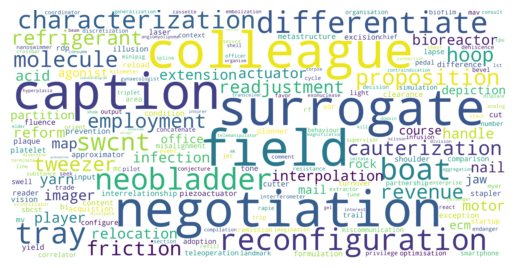

In [111]:
# Check wordcloud
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    scale = 5,
    max_font_size=100, 
    max_words=200, 
    prefer_horizontal=1,
    normalize_plurals = True,
    background_color="white").generate(' '.join(target_words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
from tqdm import tqdm 
from sklearn.preprocessing import normalize

sorted_words = sorted(target_words)
nDoc = len(df) # len(df)
doc_vector = np.zeros((len(sorted_words),nDoc)) # (words) X (docs)
# generate vector for each document
for id in tqdm(range(nDoc), desc="Document Vector Generation"):
    # # calculate frequency
    # wordcloud = WordCloud(
    #     max_words=len(target_words), 
    #     normalize_plurals = True).generate(df['Abstract'][id])
    # for iw in range(len(sorted_words)):
    #     if wordcloud.words_.get(sorted_words[iw]):
    #         doc_vector[iw,id] = wordcloud.words_[sorted_words[iw]]
    #     else:
    #         doc_vector[iw,id] = wordcloud.words_[sorted_words[iw]] = 0
    for iw in range(len(sorted_words)):
        doc_vector[iw,id] = df['Abstract'][id].count(sorted_words[iw])

doc_vector_normed = normalize(doc_vector, axis=0, norm='l2')

Document Vector Generation: 100%|██████████| 13487/13487 [19:33<00:00, 11.49it/s]


In [103]:
droped_row = []
for i in range(doc_vector.shape[0]):
    # if  max(doc_vector_normed[i,:]) < 0.05: droped_row.append(i)
    # if  max(doc_vector_normed[i,:]) > 0.5: droped_row.append(i)
    if  max(doc_vector_normed[i,:]) < 0.05: droped_row.append(i)

doc_vector_droped = np.delete(doc_vector_normed, droped_row, axis=0)
doc_vector_droped.shape

(94, 100)

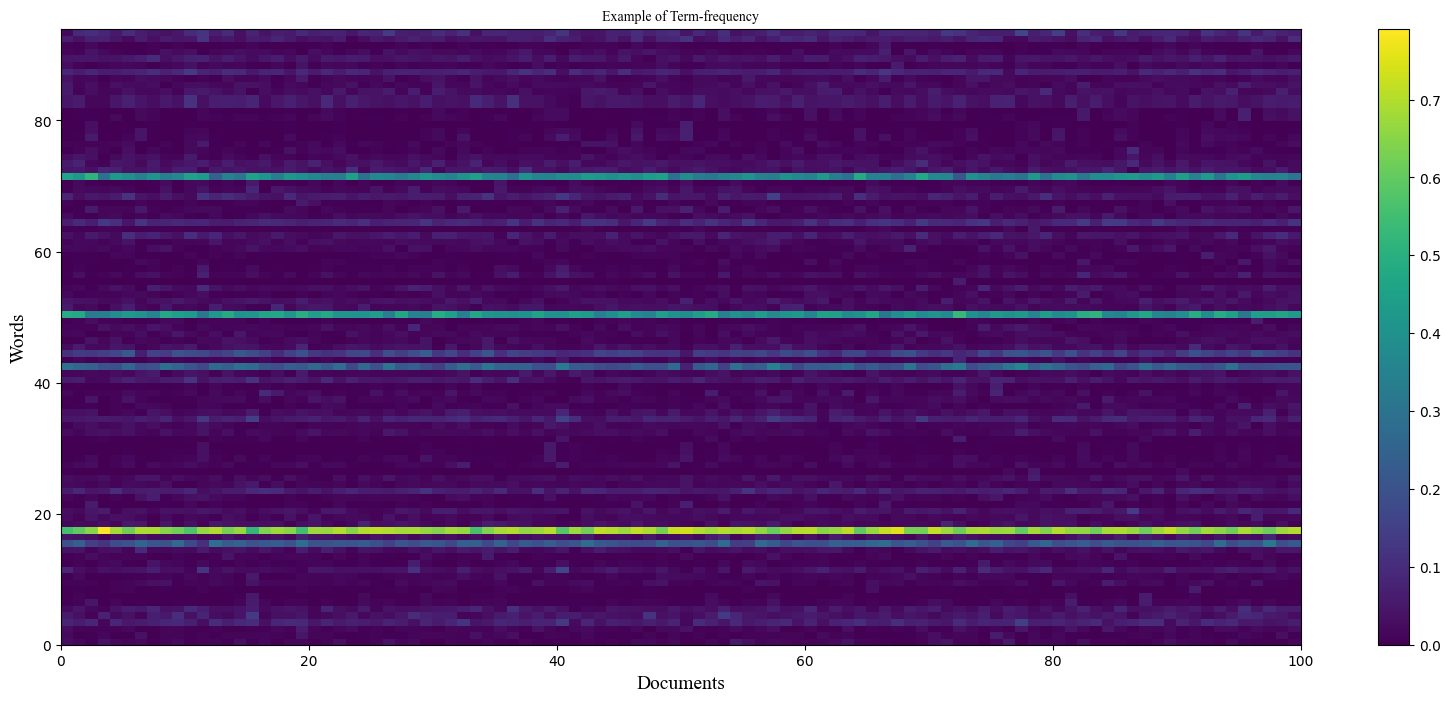

In [104]:
# heatmap by plt.pcolor()
plt.figure(figsize=(20,8))
plt.pcolor(doc_vector_droped[:,0:100])
plt.title('Example of Term-frequency', fontsize=20, font='Times New Roman')
plt.xlabel('Documents', fontsize=14, font='Times New Roman')
plt.ylabel('Words', fontsize=14, font='Times New Roman')
plt.colorbar()

In [109]:
# save vector data
doc_vector.dump(OUTPUT_PATH+"/document_frequency.npy")

# save words data
import csv
list_name = sorted_words

with open(OUTPUT_PATH+"/word_list.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(list_name)
file.close()